In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

In [ ]:
parquet_f = r"/content/drive/MyDrive/Colab Notebooks/Upstage_AI_LAB/ML/ML_Project/data/"
df_other1 = pl.read_parquet(parquet_f+"train/train_other_1.parquet").to_pandas()

In [ ]:
def print_info(df:pd.DataFrame, col_name):
    temp = '=' * 10 + ' [' + col_name + '] ' + '=' * 10
    print(temp)
    print(f'데이터 타입: {df[col_name].dtype}')
    print(f'NaN값: {any(df[col_name].isna())}, {(df[col_name].isna().sum() / df[col_name].shape[0])}')

    plt.figure(figsize=(6,4))

    if df[col_name].dtype != 'object':
        print(f"(null, 0, positive) = {df[col_name].isna().sum(), (df[col_name] == 0.0).sum(), (df[col_name] > 0.0).sum()}")
        print(f'(min, max): ({df[col_name].dropna().min()}, {df[col_name].dropna().max()})')
        print(f'평균값: {df[col_name].dropna().mean()}')
        print(f'중간값: {df[col_name].dropna().median()}')
        print('=' * len(temp))

        # min 이 음수일 경우
        if df[col_name].dropna().min() < 0:
          temp = df[col_name].dropna() + np.ceil(np.abs(df[col_name]))
          print(df[col_name].dropna().min())
        else:
          temp = df[col_name].dropna()

        # 최댓값이 크면 log 변환, diverse 문제 -> log1p() 사용
        if np.log1p(temp.max()) - np.log1p(temp.min()) > 0.1:
            log_temp = np.log1p(temp)
            sns.kdeplot(log_temp, palette='Blues_r', )
            plt.xlabel('log converted value')
        else:
            sns.kdeplot(df[col_name], palette='Blues_r', )

        plt.title(col_name)
        plt.show()
    else:
				# 날짜 데이터인 경우
        try:
            # 날짜 데이터가 크다면(500개 이상) 연도별 데이터로 변환하기
            if len(df[col_name].value_counts()) > 500:
                df_datetime = pd.DataFrame(pd.to_datetime(df[col_name]).dt.year).value_counts().reset_index()
            else:
                df_datetime = pd.DataFrame(pd.to_datetime(df[col_name])).value_counts().reset_index()

            df_datetime.columns = ['date', 'count']
            df_datetime = df_datetime.set_index('date').sort_index()

            print(f'최솟값: {df_datetime.idxmin().values[0]} | {df_datetime.min().values[0]}')
            print(f'최댓값: {df_datetime.idxmax().values[0]} | {df_datetime.max().values[0]}')

            print('- - ' * 5)
            print('value_counts:')
            print(df[col_name].value_counts())
            print('- - ' * 5)
            print('=' * len(temp))

            sns.barplot(data=df_datetime['count'], palette='Blues', )
            x_ticks_interval = int(len(df_datetime['count']) / 10)
            plt.xticks(range(0, len(df_datetime['count']), x_ticks_interval), rotation=90)
            plt.title(col_name)
            plt.show()

        # 날짜 데이터로 변환이 불가능한 경우
        except:
            print(f'(min, max): ({df[col_name].dropna().min()}, {df[col_name].dropna().max()})')

            print('- - ' * 5)
            print('value_counts:')
            print(df[col_name].value_counts())
            print('- - ' * 5)
            print('=' * len(temp))

						# 카테고리가 10개를 넘는다면 5개만을 뽑아서 시각화
            if len(df[col_name].value_counts()) > 10:
                slice = 5
            else:
                slice = len(df[col_name])

            sns.countplot(data=df, x=col_name, order=df[col_name].value_counts()[:slice].index, palette='Blues_r', )
            plt.xticks(rotation=90, ha='right')
            plt.title(col_name)
            plt.show()

# train_other_1
- debit card, deposit에 관한 신용 거래 정보에 대한 file
- null이 없으며, case_id가 모두 unique한 값

In [ ]:
df_other1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51109 entries, 0 to 51108
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      51109 non-null  int64  
 1   amtdebitincoming_4809443A    51109 non-null  float64
 2   amtdebitoutgoing_4809440A    51109 non-null  float64
 3   amtdepositbalance_4809441A   51109 non-null  float64
 4   amtdepositincoming_4809444A  51109 non-null  float64
 5   amtdepositoutgoing_4809442A  51109 non-null  float64
 6   num_group1                   51109 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.7 MB


In [ ]:
len(df_other1.case_id.unique())

51109

In [ ]:
df_other1.num_group1.value_counts()

0    51109
Name: num_group1, dtype: int64

## amtdebitincoming_4809443A
- Incoming debit card transactions amount.
- 직불 카드 거래를 통해 고객 계정에 입금된 총 금액

========== [amtdebitincoming_4809443A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 27053, 24056)
(min, max): (0.0, 4957852.0)
평균값: 7552.901685678104
중간값: 0.0


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


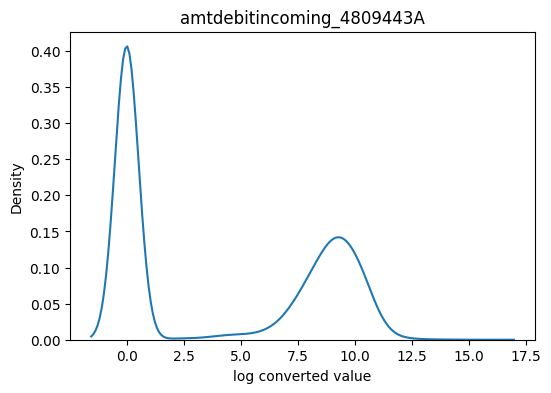

In [ ]:
print_info(df_other1, df_other1.columns[1])

========== [amtdebitincoming_4809443A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 0, 24056)
(min, max): (0.2, 4957852.0)
평균값: 16046.776365701784
중간값: 8677.4005


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


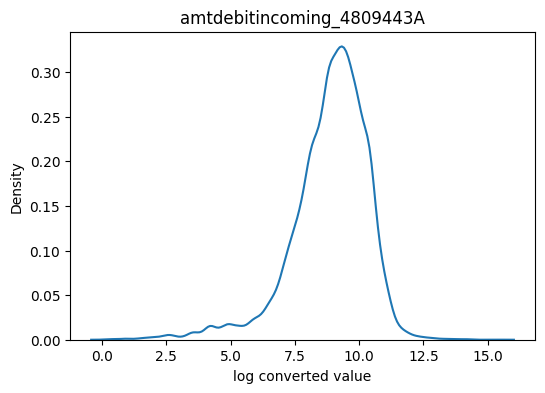

In [ ]:
print_info(df_other1[df_other1.amtdebitincoming_4809443A>0], df_other1.columns[1])

In [ ]:
df_other1.amtdebitincoming_4809443A

0        12466.6010
1         3333.4001
2        10000.0000
3            0.0000
4           63.8000
            ...    
51104      344.6000
51105        0.0000
51106        0.0000
51107    27500.0000
51108    13454.0000
Name: amtdebitincoming_4809443A, Length: 51109, dtype: float64

In [ ]:
np.expm1(10.0)

22025.465794806718

## amtdebitoutgoing_4809440A
- Outgoing debit card transactions amount.
- 직불 카드를 사용하여 지출한 총 금액

========== [amtdebitoutgoing_4809440A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 27286, 23823)
(min, max): (0.0, 5168004.5)
평균값: 7462.384277757748
중간값: 0.0


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


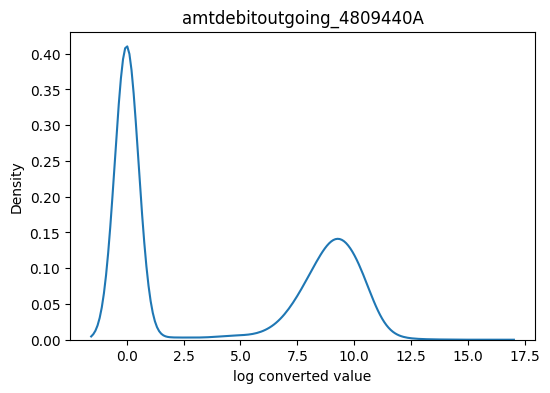

In [ ]:
print_info(df_other1, df_other1.columns[2])

========== [amtdebitoutgoing_4809440A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 0, 23823)
(min, max): (0.2, 5168004.5)
평균값: 16009.5285250355
중간값: 8700.0


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


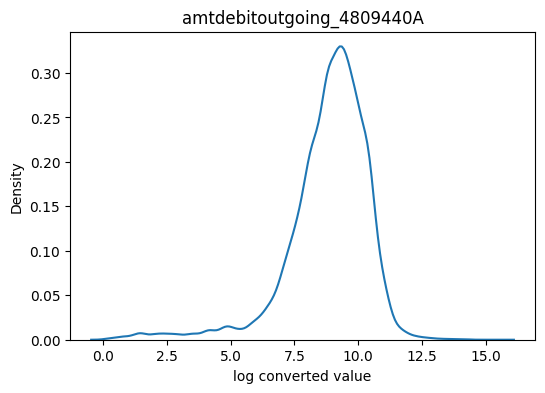

In [ ]:
print_info(df_other1[df_other1.amtdebitoutgoing_4809440A > 0.0], df_other1.columns[2])

## amtdepositbalance_4809441A
- Deposit balance of client.
- 고객 계정의 현재 예금 잔액

>**해설**
-

========== [amtdepositbalance_4809441A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 32235, 18873)
(min, max): (-335718.0, 4256314.5)
평균값: 9967.412999351387
중간값: 0.0
-335718.0


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


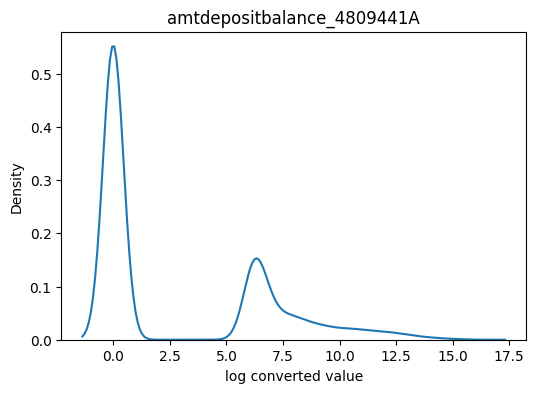

In [ ]:
print_info(df_other1, df_other1.columns[3])

## amtdepositincoming_4809444A
- Amount of incoming deposits to client's account.
- 고객 계좌에 입금된 총 금액

========== [amtdepositincoming_4809444A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 45985, 5124)
(min, max): (0.0, 4180150.5)
평균값: 2949.3958999324345
중간값: 0.0


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


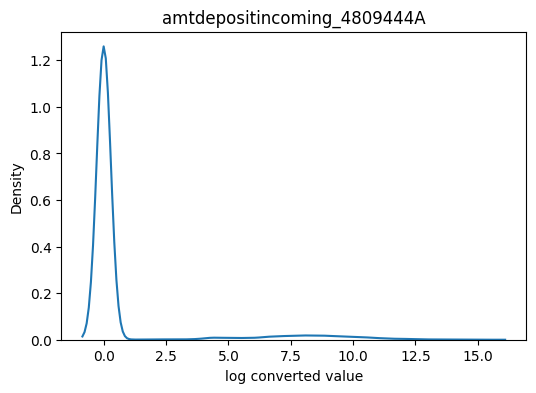

In [ ]:
print_info(df_other1, df_other1.columns[4])

## amtdepositoutgoing_4809442A
- Amount of outgoing deposits from client's account.
- 고객 계정에서 인출 또는 이체된 금액

========== [amtdepositoutgoing_4809442A] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 22433, 28676)
(min, max): (0.0, 4622917.5)
평균값: 3586.8751183165705
중간값: 1.8000001


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


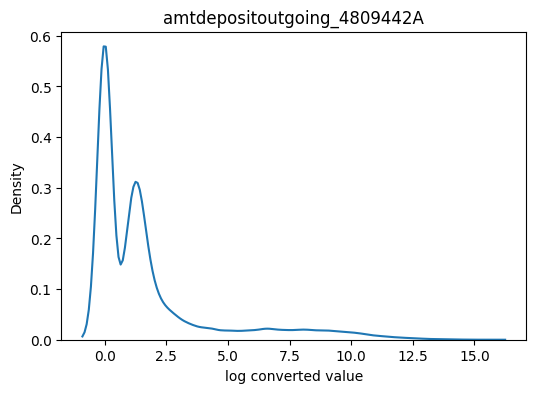

In [ ]:
print_info(df_other1, df_other1.columns[5])

# Feature Engineering
- `incoming_amount`: debit card로 들어오거나 혹은 account에 바로 deposit되는 amount 총 합산
- `outgoing_amount`: debit card로 나가거나 혹은 account에서 바로 출금되는 amount 총 합산
- `amtdepositbalance_4809441A`: 현재 계좌의 예금잔액

In [ ]:
# 비슷한 zero, positive 비율 > 이분법으로 나눠서 생각해볼 수 있음
data =[]

for col_name in df_other1.columns[1:6]:
  if df_other1[col_name].dtype != 'object':
    null_sum = df_other1[col_name].isna().sum()
    zero_sum = (df_other1[col_name] == 0.0).sum()
    positive_sum = (df_other1[col_name] > 0.0).sum()

    data.append([col_name, (null_sum, zero_sum, positive_sum), zero_sum / (zero_sum + positive_sum), positive_sum / (zero_sum + positive_sum)])


rate_df = pd.DataFrame(data, columns=['Columns', '(null, 0, positive)', 'zero_rate', 'positive_rate']).set_index(['Columns'])
rate_df

,"(null, 0, positive)",zero_rate,positive_rate
Columns,,,
amtdebitincoming_4809443A,"(0, 27053, 24056)",0.529320,0.470680
amtdebitoutgoing_4809440A,"(0, 27286, 23823)",0.533879,0.466121
amtdepositbalance_4809441A,"(0, 32235, 18873)",0.630723,0.369277
amtdepositincoming_4809444A,"(0, 45985, 5124)",0.899744,0.100256
amtdepositoutgoing_4809442A,"(0, 22433, 28676)",0.438925,0.561075


In [ ]:
(df_other1.case_id.value_counts()).value_counts()

1    51109
Name: case_id, dtype: int64

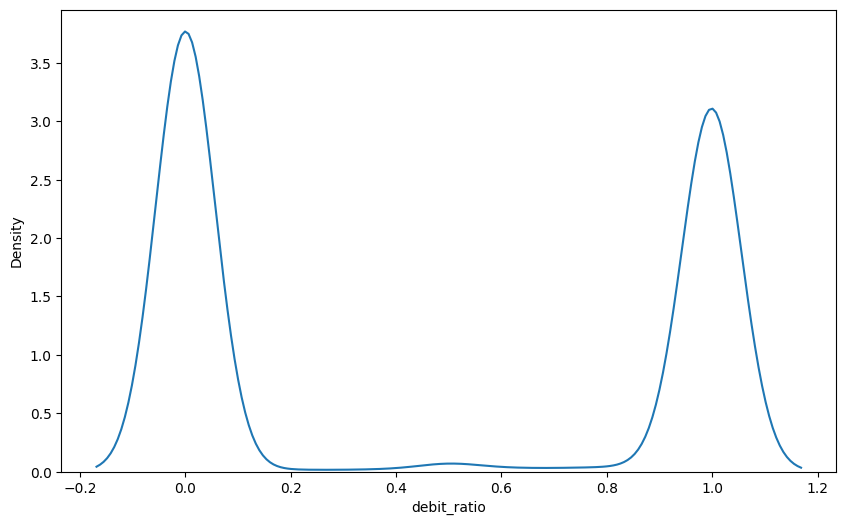

In [ ]:
debit_card = df_other1.amtdebitincoming_4809443A
account = df_other1.amtdepositincoming_4809444A
df_other1['debit_ratio']  = debit_card / (debit_card + account + 1)
df_other1['account_ratio'] = account / (debit_card + account + 1)
df_other1

plt.figure(figsize=(10, 6))
sns.kdeplot(df_other1['debit_ratio'])
plt.show()

<Axes: xlabel='debit_ratio', ylabel='Density'>

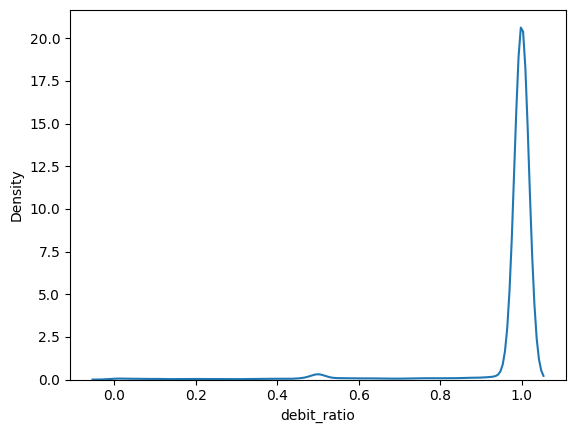

In [ ]:
sns.kdeplot(df_other1['debit_ratio'][df_other1['debit_ratio'] != 0.0])

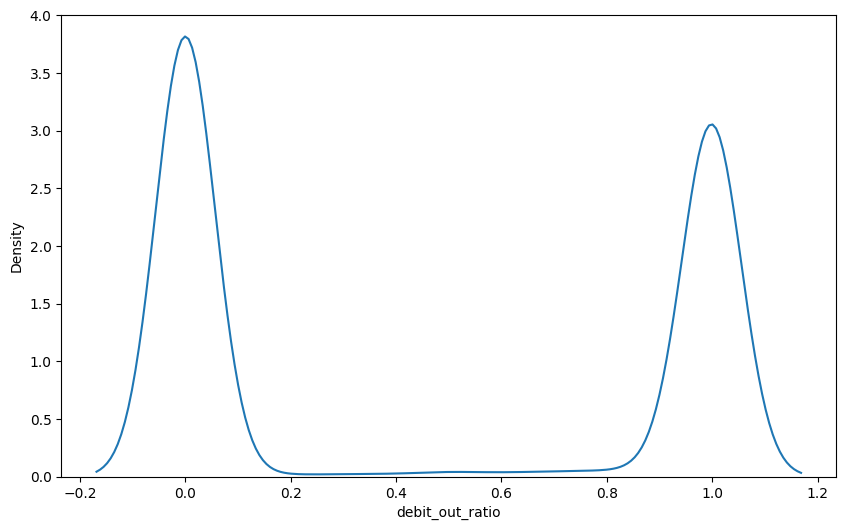

In [ ]:
debit_card = df_other1.amtdebitoutgoing_4809440A
account = df_other1.amtdepositoutgoing_4809442A
df_other1['debit_out_ratio']  = debit_card / (debit_card + account + 1)
df_other1['account_out_ratio'] = account / (debit_card + account + 1)
df_other1

plt.figure(figsize=(10, 6))
sns.kdeplot(df_other1['debit_out_ratio'])
plt.show()

<Axes: xlabel='debit_out_ratio', ylabel='Density'>

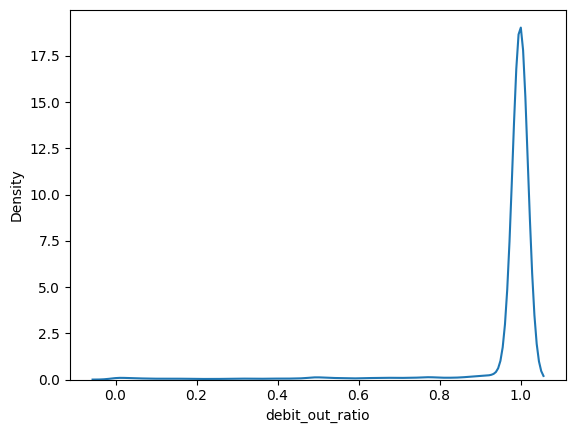

In [ ]:
sns.kdeplot(df_other1['debit_out_ratio'][df_other1['debit_out_ratio'] != 0.0])

In [ ]:
df_other1['incoming_amount'] = df_other1.amtdebitincoming_4809443A + df_other1.amtdepositincoming_4809444A
df_other1['outgoing_amount'] = df_other1.amtdebitoutgoing_4809440A + df_other1.amtdepositoutgoing_4809442A


========== [incoming_amount] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 23860, 27249)
(min, max): (0.0, 4957852.0)
평균값: 10502.297585610539
중간값: 385.4


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


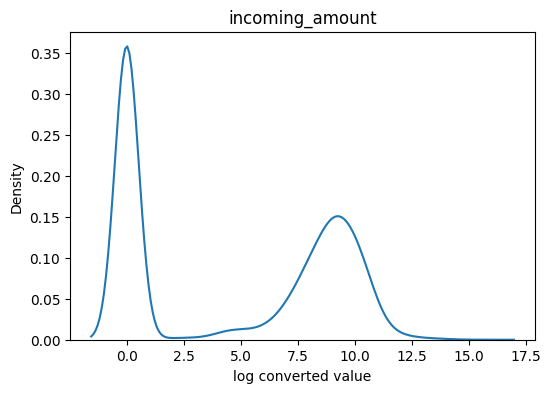

In [ ]:
print_info(df_other1, 'incoming_amount')

========== [outgoing_amount] ==========
데이터 타입: float64
NaN값: False, 0.0
(null, 0, positive) = (0, 3508, 47601)
(min, max): (0.0, 5168004.5)
평균값: 11049.259396074316
중간값: 656.8


<ipython-input-3-83ceb0ce54fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


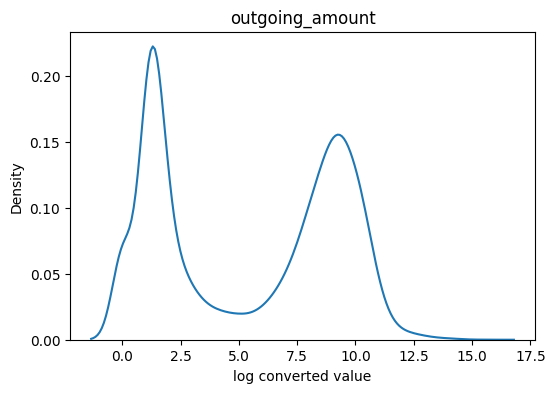

In [ ]:
print_info(df_other1, 'outgoing_amount')